# **HCDR Dataset Preprocessing**

In [1]:
from src import utilities
from src import preprocessing
from src import plotting

hcdr_dataset_path = '../../datasets/home-credit-default-risk/application_train.csv'
hcdr_prep_dataset_path = '../../datasets/preprocessed/hcdr/'

(CVXPY) Mar 05 01:11:30 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Mar 05 01:11:30 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.5.2237). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


In [2]:
utilities.create_directory(hcdr_prep_dataset_path)

In [3]:
data = utilities.read_csv(hcdr_dataset_path, dtype={'TARGET':'bool', 'NAME_CONTRACT_TYPE':'category',
                                                    'CODE_GENDER':'category', 'FLAG_OWN_CAR':'category',
                                                    'FLAG_OWN_REALTY':'category', 'NAME_TYPE_SUITE':'category',
                                                    'NAME_INCOME_TYPE':'category', 'NAME_EDUCATION_TYPE':'category',
                                                    'NAME_FAMILY_STATUS':'category', 'NAME_HOUSING_TYPE':'category',
                                                    'OCCUPATION_TYPE':'category', 'WEEKDAY_APPR_PROCESS_START':'category',
                                                    'ORGANIZATION_TYPE':'category', 'FONDKAPREMONT_MODE':'category',
                                                    'HOUSETYPE_MODE':'category', 'WALLSMATERIAL_MODE':'category',
                                                    'EMERGENCYSTATE_MODE':'category', 'DAYS_BIRTH':'float64',
                                                    'DAYS_EMPLOYED':'float64', 'DAYS_REGISTRATION':'float64',
                                                    'DAYS_ID_PUBLISH':'float64', 'DAYS_LAST_PHONE_CHANGE':'float64'})
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,True,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,False,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,False,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,False,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,False,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,False,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,False,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,False,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,True,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int64   
 1    TARGET                        bool    
 2    NAME_CONTRACT_TYPE            category
 3    CODE_GENDER                   category
 4    FLAG_OWN_CAR                  category
 5    FLAG_OWN_REALTY               category
 6    CNT_CHILDREN                  int64   
 7    AMT_INCOME_TOTAL              float64 
 8    AMT_CREDIT                    float64 
 9    AMT_ANNUITY                   float64 
 10   AMT_GOODS_PRICE               float64 
 11   NAME_TYPE_SUITE               category
 12   NAME_INCOME_TYPE              category
 13   NAME_EDUCATION_TYPE           category
 14   NAME_FAMILY_STATUS            category
 15   NAME_HOUSING_TYPE             category
 16   REGION_POPULATION_RELATIVE    float64 
 17   DAYS_BIRTH                 

#### Convert `int64` to `float94`.

In [5]:
utilities.int64_to_float64(data)

#### Plot features data types.

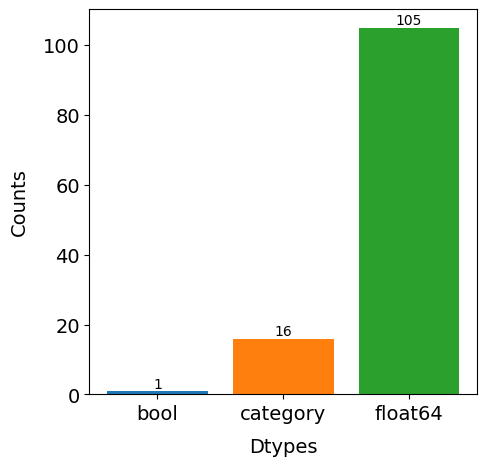

In [6]:
plotting.plot_dtypes_hist(data, '', 'Dtypes', 'Counts',
                          save_path=hcdr_prep_dataset_path + 'dtypes.pdf')

#### Data cleaning.

In [7]:
before_data_cleaning_count = len(data)

#### Fix days counts relative to the loan application date.

In [8]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH']/-365.25
data['DAYS_EMPLOYED'] = data['DAYS_EMPLOYED'].abs()
data['DAYS_REGISTRATION'] = data['DAYS_REGISTRATION'].abs()
data['DAYS_ID_PUBLISH'] = data['DAYS_ID_PUBLISH'].abs()
data['DAYS_LAST_PHONE_CHANGE'] = data['DAYS_LAST_PHONE_CHANGE'].abs()

#### Rename features labels to have more meaningful names.

In [9]:
data.rename(columns={'SK_ID_CURR': 'id',
                     'TARGET': 'defaulted',
                     'NAME_CONTRACT_TYPE': 'credit-type',
                     'CODE_GENDER': 'gender',
                     'FLAG_OWN_CAR': 'owns-car',
                     'FLAG_OWN_REALTY': 'owns-real-estate',
                     'CNT_CHILDREN': 'cnt-children',
                     'AMT_INCOME_TOTAL': 'income-amount',
                     'AMT_CREDIT': 'credit-amount',
                     'AMT_ANNUITY': 'annuity-amount',
                     'AMT_GOODS_PRICE': 'goods-amount',
                     'NAME_TYPE_SUITE': 'accompanying',
                     'NAME_INCOME_TYPE': 'income-type',
                     'NAME_EDUCATION_TYPE': 'education-level',
                     'NAME_FAMILY_STATUS': 'marital-status',
                     'NAME_HOUSING_TYPE': 'housing-situation',
                     'REGION_POPULATION_RELATIVE': 'region-population',
                     'DAYS_BIRTH': 'age',
                     'DAYS_EMPLOYED': 'days-employed',
                     'DAYS_REGISTRATION': 'days-registration',
                     'DAYS_ID_PUBLISH': 'days-id-document',
                     'OWN_CAR_AGE': 'car-years',
                     'FLAG_MOBIL': 'mobile-phone-provided',
                     'FLAG_EMP_PHONE': 'home-phone-provided',
                     'FLAG_WORK_PHONE': 'work-phone-provided',
                     'FLAG_CONT_MOBILE': 'mobile-reachable',
                     'FLAG_PHONE': 'home-phone',
                     'FLAG_EMAIL': 'email-provided',
                     'OCCUPATION_TYPE': 'occupation-type',
                     'CNT_FAM_MEMBERS': 'family-members',
                     'REGION_RATING_CLIENT': 'region-rating',
                     'REGION_RATING_CLIENT_W_CITY': 'city-rating',
                     'WEEKDAY_APPR_PROCESS_START': 'appl-week-day',
                     'HOUR_APPR_PROCESS_START': 'appl-hour',
                     'REG_REGION_NOT_LIVE_REGION': 'perm-cont-addr-match',
                     'REG_REGION_NOT_WORK_REGION': 'perm-work-addr-match',
                     'LIVE_REGION_NOT_WORK_REGION': 'cont-work-addr-match',
                     'REG_CITY_NOT_LIVE_CITY': 'perm-cont-city-match',
                     'REG_CITY_NOT_WORK_CITY': 'perm-work-city-match',
                     'LIVE_CITY_NOT_WORK_CITY': 'cont-work-city-match',
                     'ORGANIZATION_TYPE': 'work-org-type',
                     'EXT_SOURCE_1': 'ext-source-score-1',
                     'EXT_SOURCE_2': 'ext-source-score-2',
                     'EXT_SOURCE_3': 'ext-source-score-3',
                     'APARTMENTS_AVG': 'building-rating-1',
                     'BASEMENTAREA_AVG': 'building-rating-2',
                     'YEARS_BEGINEXPLUATATION_AVG': 'building-rating-3',
                     'YEARS_BUILD_AVG': 'building-rating-4',
                     'COMMONAREA_AVG': 'building-rating-5',
                     'ELEVATORS_AVG': 'building-rating-6',
                     'ENTRANCES_AVG': 'building-rating-7',
                     'FLOORSMAX_AVG': 'building-rating-8',
                     'FLOORSMIN_AVG': 'building-rating-9',
                     'LANDAREA_AVG': 'building-rating-10',
                     'LIVINGAPARTMENTS_AVG': 'building-rating-11',
                     'LIVINGAREA_AVG': 'building-rating-12',
                     'NONLIVINGAPARTMENTS_AVG': 'building-rating-13',
                     'NONLIVINGAREA_AVG': 'building-rating-14',
                     'APARTMENTS_MODE': 'building-rating-15',
                     'BASEMENTAREA_MODE': 'building-rating-16',
                     'YEARS_BEGINEXPLUATATION_MODE': 'building-rating-17',
                     'YEARS_BUILD_MODE': 'building-rating-18',
                     'COMMONAREA_MODE': 'building-rating-19',
                     'ELEVATORS_MODE': 'building-rating-20',
                     'ENTRANCES_MODE': 'building-rating-21',
                     'FLOORSMAX_MODE': 'building-rating-22',
                     'FLOORSMIN_MODE': 'building-rating-23',
                     'LANDAREA_MODE': 'building-rating-24',
                     'LIVINGAPARTMENTS_MODE': 'building-rating-25',
                     'LIVINGAREA_MODE': 'building-rating-26',
                     'NONLIVINGAPARTMENTS_MODE': 'building-rating-27',
                     'NONLIVINGAREA_MODE': 'building-rating-28',
                     'APARTMENTS_MEDI': 'building-rating-29',
                     'BASEMENTAREA_MEDI': 'building-rating-30',
                     'YEARS_BEGINEXPLUATATION_MEDI': 'building-rating-31',
                     'YEARS_BUILD_MEDI': 'building-rating-32',
                     'COMMONAREA_MEDI': 'building-rating-33',
                     'ELEVATORS_MEDI': 'building-rating-34',
                     'ENTRANCES_MEDI': 'building-rating-35',
                     'FLOORSMAX_MEDI': 'building-rating-36',
                     'FLOORSMIN_MEDI': 'building-rating-37',
                     'LANDAREA_MEDI': 'building-rating-38',
                     'LIVINGAPARTMENTS_MEDI': 'building-rating-39',
                     'LIVINGAREA_MEDI': 'building-rating-40',
                     'NONLIVINGAPARTMENTS_MEDI': 'building-rating-41',
                     'NONLIVINGAREA_MEDI': 'building-rating-42',
                     'FONDKAPREMONT_MODE': 'building-rating-43',
                     'HOUSETYPE_MODE': 'building-rating-44',
                     'TOTALAREA_MODE': 'building-rating-45',
                     'WALLSMATERIAL_MODE': 'building-rating-46',
                     'EMERGENCYSTATE_MODE': 'building-rating-47',
                     'OBS_30_CNT_SOCIAL_CIRCLE': 'social-dpd-30',
                     'DEF_30_CNT_SOCIAL_CIRCLE': 'social-dpd-30-defaulted',
                     'OBS_60_CNT_SOCIAL_CIRCLE': 'social-dpd-60',
                     'DEF_60_CNT_SOCIAL_CIRCLE': 'social-dpd-60-defaulted',
                     'DAYS_LAST_PHONE_CHANGE': 'days-phone-changed',
                     'FLAG_DOCUMENT_2': 'doc-2-provided',
                     'FLAG_DOCUMENT_3': 'doc-3-provided',
                     'FLAG_DOCUMENT_4': 'doc-4-provided',
                     'FLAG_DOCUMENT_5': 'doc-5-provided',
                     'FLAG_DOCUMENT_6': 'doc-6-provided',
                     'FLAG_DOCUMENT_7': 'doc-7-provided',
                     'FLAG_DOCUMENT_8': 'doc-8-provided',
                     'FLAG_DOCUMENT_9': 'doc-9-provided',
                     'FLAG_DOCUMENT_10': 'doc-10-provided',
                     'FLAG_DOCUMENT_11': 'doc-11-provided',
                     'FLAG_DOCUMENT_12': 'doc-12-provided',
                     'FLAG_DOCUMENT_13': 'doc-13-provided',
                     'FLAG_DOCUMENT_14': 'doc-14-provided',
                     'FLAG_DOCUMENT_15': 'doc-15-provided',
                     'FLAG_DOCUMENT_16': 'doc-16-provided',
                     'FLAG_DOCUMENT_17': 'doc-17-provided',
                     'FLAG_DOCUMENT_18': 'doc-18-provided',
                     'FLAG_DOCUMENT_19': 'doc-19-provided',
                     'FLAG_DOCUMENT_20': 'doc-20-provided',
                     'FLAG_DOCUMENT_21': 'doc-21-provided',
                     'AMT_REQ_CREDIT_BUREAU_HOUR': 'hour-credit-bureau-inqs',
                     'AMT_REQ_CREDIT_BUREAU_DAY': 'day-credit-bureau-inqs',
                     'AMT_REQ_CREDIT_BUREAU_WEEK': 'week-credit-bureau-inqs',
                     'AMT_REQ_CREDIT_BUREAU_MON': 'month-credit-bureau-inqs',
                     'AMT_REQ_CREDIT_BUREAU_QRT': 'quarter-credit-bureau-inqs',
                     'AMT_REQ_CREDIT_BUREAU_YEAR': 'year-credit-bureau-inqs'}, inplace=True)

#### Plot class distribution.

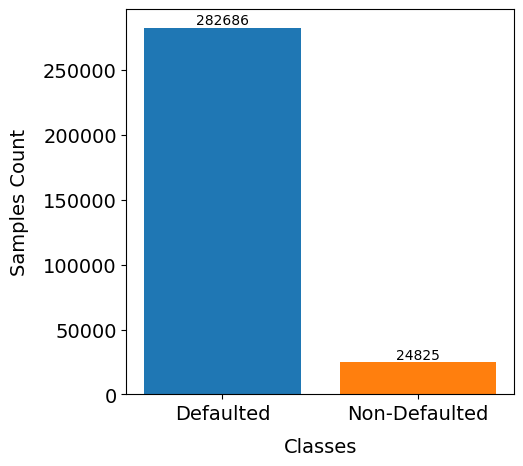

In [10]:
plotting.plot_hist(['Defaulted', 'Non-Defaulted'], data.defaulted.value_counts().values,
                   '', 'Classes', 'Samples Count',
                   save_path=hcdr_prep_dataset_path + 'class_distribution.pdf')

#### Drop useless and ambiguous features.

In [11]:
data.drop(['id', 'home-phone-provided', 'work-phone-provided', 'home-phone'], axis=1, inplace=True)

#### Drop redundant features using IV score.
#### This was computed previously but getting rid of them a-priori helps next pre-processing steps.

In [12]:
data.drop(['mobile-phone-provided', 'mobile-reachable', 'region-rating', 'city-rating', 'perm-cont-addr-match', 'cont-work-addr-match', 'cont-work-city-match'], axis=1, inplace=True)

In [13]:
data.drop(['building-rating-1', 'building-rating-2', 'building-rating-3', 'building-rating-4', 'building-rating-5', 'building-rating-6', 'building-rating-7', 'building-rating-9', 'building-rating-10', 'building-rating-11', 'building-rating-12', 'building-rating-13', 'building-rating-14', 'building-rating-15', 'building-rating-16', 'building-rating-17', 'building-rating-18', 'building-rating-19', 'building-rating-20', 'building-rating-21', 'building-rating-22', 'building-rating-23', 'building-rating-24', 'building-rating-25', 'building-rating-26', 'building-rating-27', 'building-rating-28', 'building-rating-29', 'building-rating-30', 'building-rating-31', 'building-rating-32', 'building-rating-33', 'building-rating-34', 'building-rating-35', 'building-rating-36', 'building-rating-37', 'building-rating-38', 'building-rating-39', 'building-rating-40', 'building-rating-41', 'building-rating-42', 'building-rating-43', 'building-rating-44', 'building-rating-45', 'building-rating-46', 'building-rating-47'], axis=1, inplace=True)

In [14]:
data.drop(['doc-2-provided', 'doc-4-provided', 'doc-5-provided', 'doc-7-provided', 'doc-8-provided', 'doc-9-provided', 'doc-10-provided', 'doc-11-provided', 'doc-12-provided', 'doc-13-provided', 'doc-14-provided', 'doc-15-provided', 'doc-16-provided', 'doc-17-provided', 'doc-18-provided', 'doc-19-provided', 'doc-20-provided', 'doc-21-provided'], axis=1, inplace=True)

In [15]:
data.drop(['social-dpd-60', 'social-dpd-60-defaulted', 'hour-credit-bureau-inqs', 'day-credit-bureau-inqs', 'week-credit-bureau-inqs', 'month-credit-bureau-inqs', 'quarter-credit-bureau-inqs'], axis=1, inplace=True)

#### Handle special missing values.

In [16]:
utilities.replace_to_nan(data, "XAP")
utilities.replace_to_nan(data, "XNA")
utilities.replace_to_nan(data, "Unknown")

#### Plot missing values histogram.

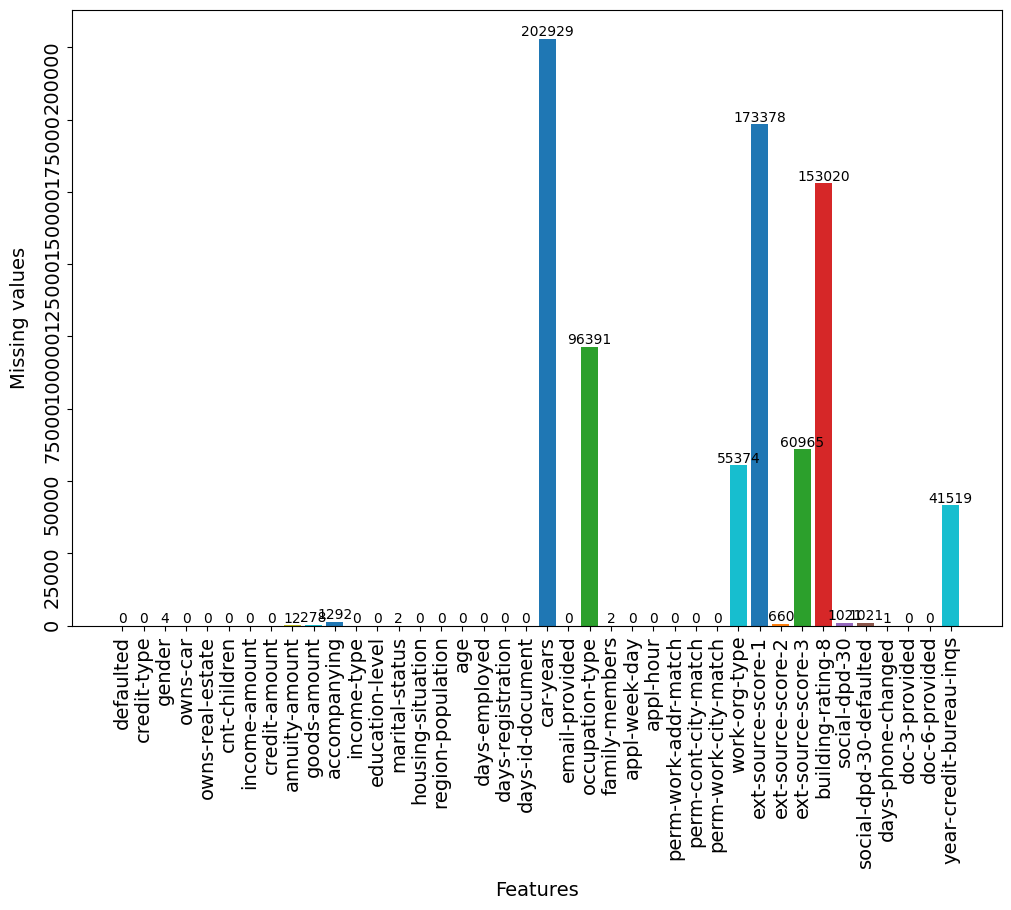

In [17]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(12,8),
                   rotated_ticks=True, save_path=hcdr_prep_dataset_path + 'missing_values-1.pdf')

#### Fix features for which binning returns (-inf, inf).

In [18]:
data['email-provided'] = data['email-provided'].astype('category')
data['perm-work-addr-match'] = data['perm-work-addr-match'].astype('category')
data['perm-cont-city-match'] = data['perm-cont-city-match'].astype('category')
data['perm-work-city-match'] = data['perm-work-city-match'].astype('category')
data['doc-6-provided'] = data['doc-6-provided'].astype('category')

#### Apply optimal binninf and WoE.

In [19]:
data, features_scores = preprocessing.opt_bin_woe(data=data, solver="cp",
                                                  outlier_detector="range",
                                                  save_path=hcdr_prep_dataset_path,
                                                  verbose=False)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:11<00:00,  3.52it/s]


In [20]:
data

,defaulted,credit-type,gender,owns-car,owns-real-estate,cnt-children,income-amount,credit-amount,annuity-amount,goods-amount,...,ext-source-score-1,ext-source-score-2,ext-source-score-3,building-rating-8,social-dpd-30,social-dpd-30-defaulted,days-phone-changed,doc-3-provided,doc-6-provided,year-credit-bureau-inqs
0,True,-0.036236,-0.250931,-0.056242,0.015093,0.045934,0.022986,-0.388537,-0.115170,-0.143958,...,-0.721189,-0.384543,-1.176614,-0.081602,-0.030141,-0.002224,0.133897,-0.099767,-0.032188,0.102098
1,False,-0.036236,0.154307,-0.056242,-0.033490,0.045934,0.220444,0.425256,-0.041960,0.295792,...,-0.155311,0.371476,0.000000,0.308640,0.004764,-0.002224,-0.040824,-0.099767,-0.032188,0.131724
2,False,0.415543,-0.250931,0.117353,0.015093,0.045934,0.050490,0.327368,0.195039,-0.143958,...,0.000000,0.190548,0.913839,0.000000,0.016206,-0.002224,-0.040824,0.287143,-0.032188,0.131724
3,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.045439,-0.166937,-0.115170,-0.143958,...,0.000000,0.425190,0.000000,0.000000,-0.030141,-0.002224,-0.140862,-0.099767,-0.032188,0.000000
4,False,-0.036236,-0.250931,-0.056242,0.015093,0.045934,-0.079052,-0.207574,-0.070074,0.074176,...,0.000000,-0.384543,0.000000,0.000000,0.016206,-0.002224,0.015677,0.287143,-0.032188,0.131724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,-0.036236,-0.250931,-0.056242,-0.033490,0.045934,-0.045439,0.060453,-0.115170,-0.143958,...,-0.721189,0.630759,0.000000,0.460931,0.016206,-0.002224,-0.191406,0.287143,-0.032188,0.000000
307507,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,0.050490,0.060453,0.195039,-0.143958,...,0.000000,-1.169118,0.000000,-0.081602,0.016206,-0.002224,-0.191406,-0.099767,-0.032188,0.000000
307508,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.045439,0.081030,-0.354649,0.074176,...,1.016443,0.050367,-0.629744,0.135167,-0.080059,-0.002224,0.291179,-0.099767,-0.032188,0.102098
307509,True,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.024923,-0.222612,-0.070074,-0.143958,...,0.000000,0.050367,0.691855,-0.081602,0.016206,-0.002224,-0.191406,-0.099767,-0.032188,0.131724


#### All missing values handled.

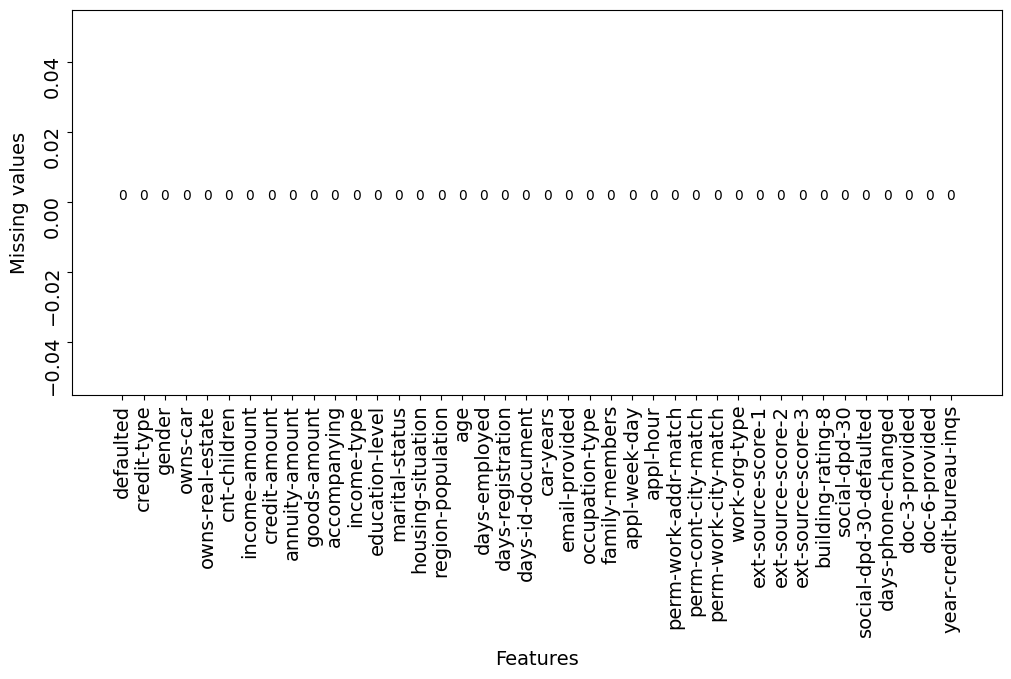

In [21]:
labels = [str(idx) for idx in data.isna().sum(axis=0).index]
values = data.isna().sum(axis=0).values
plotting.plot_hist(labels, values, '', 'Features', 'Missing values', figsize=(12,5),
                   rotated_ticks=True, save_path=hcdr_prep_dataset_path + 'missing_values-2.pdf')

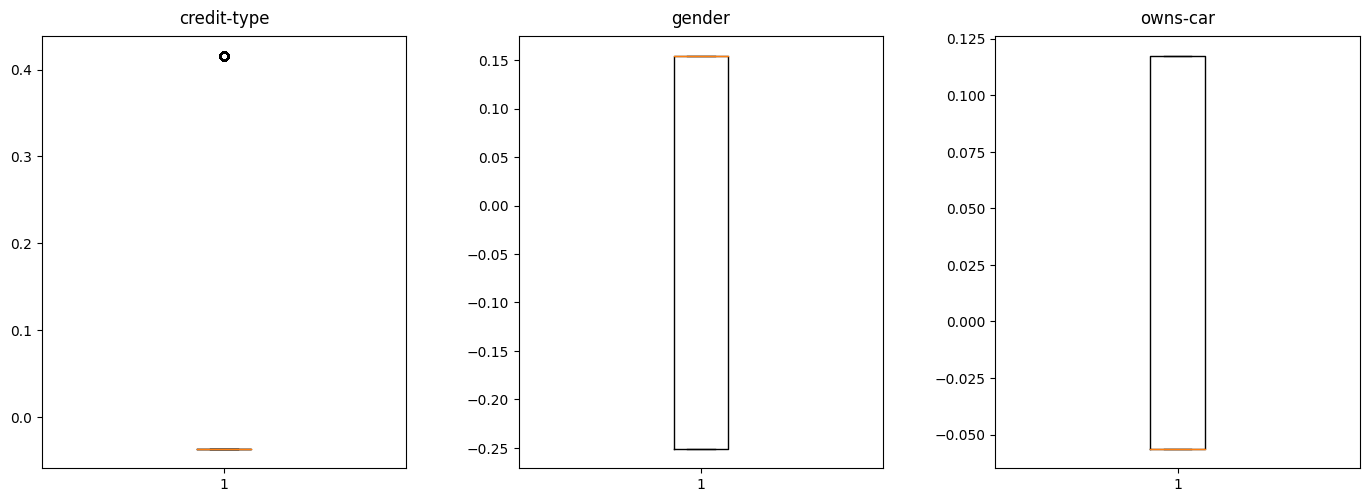

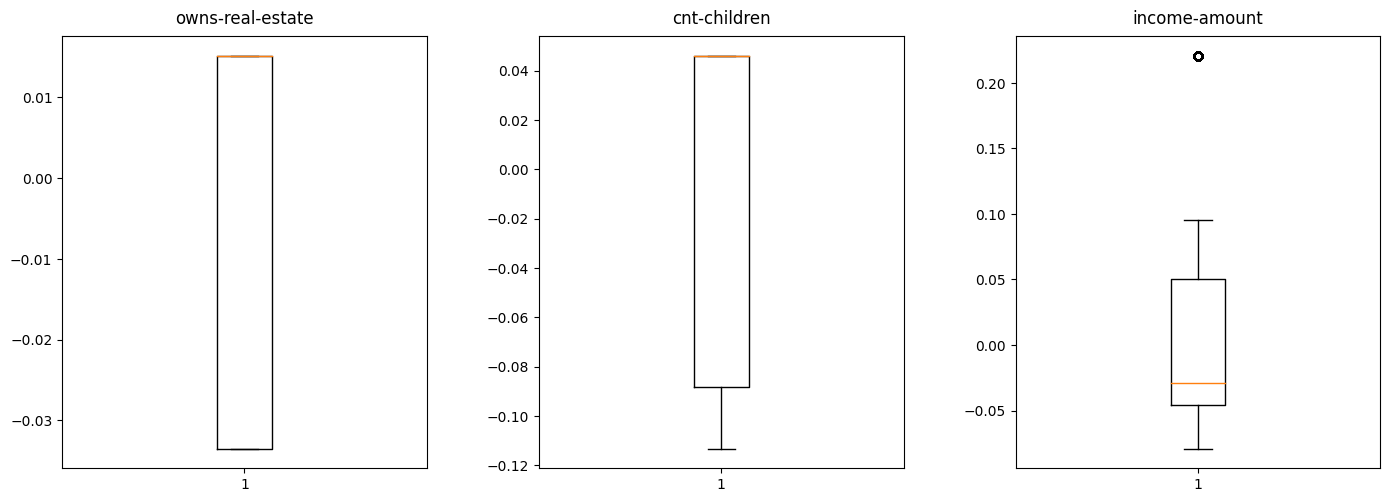

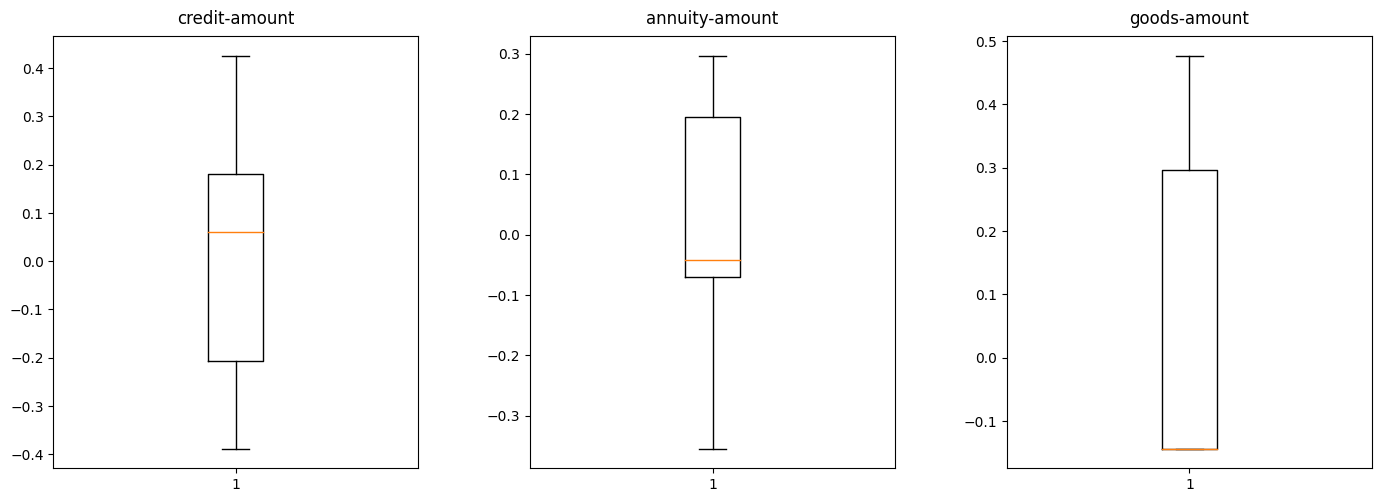

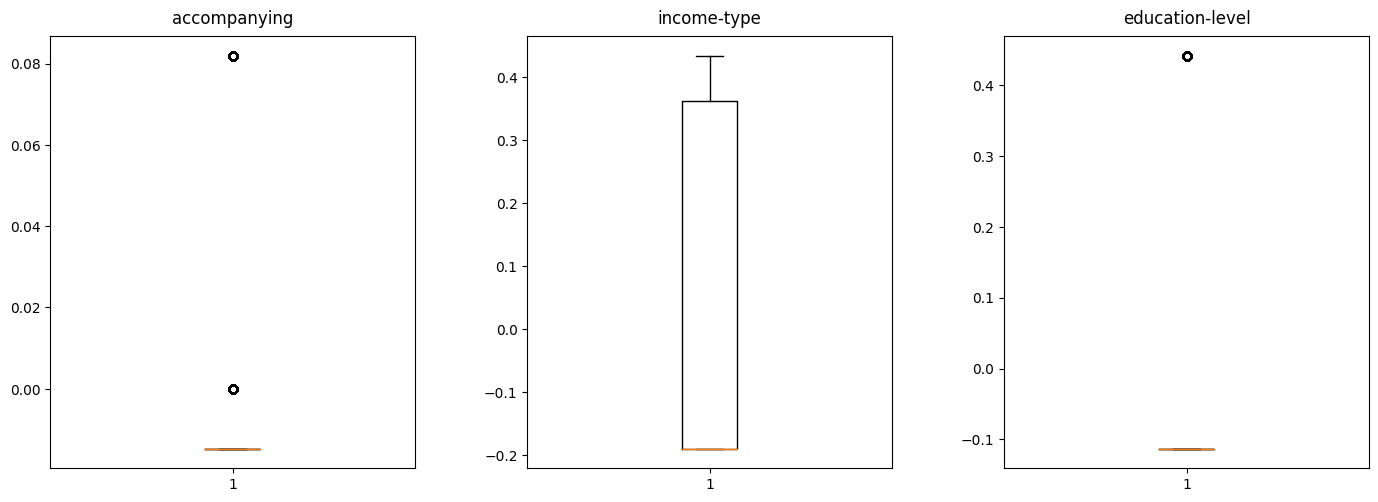

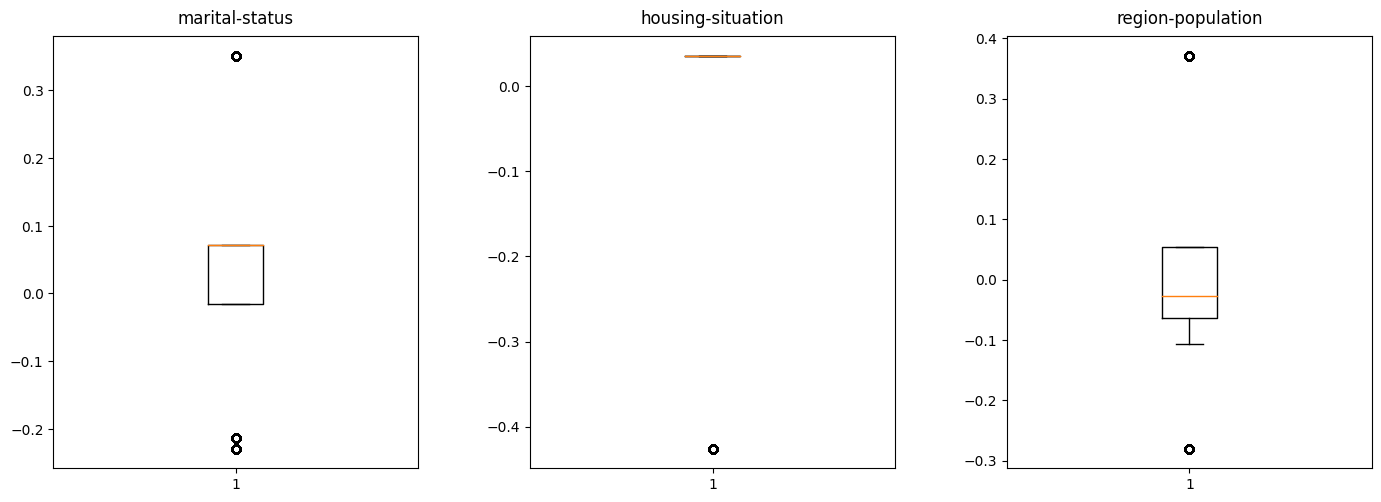

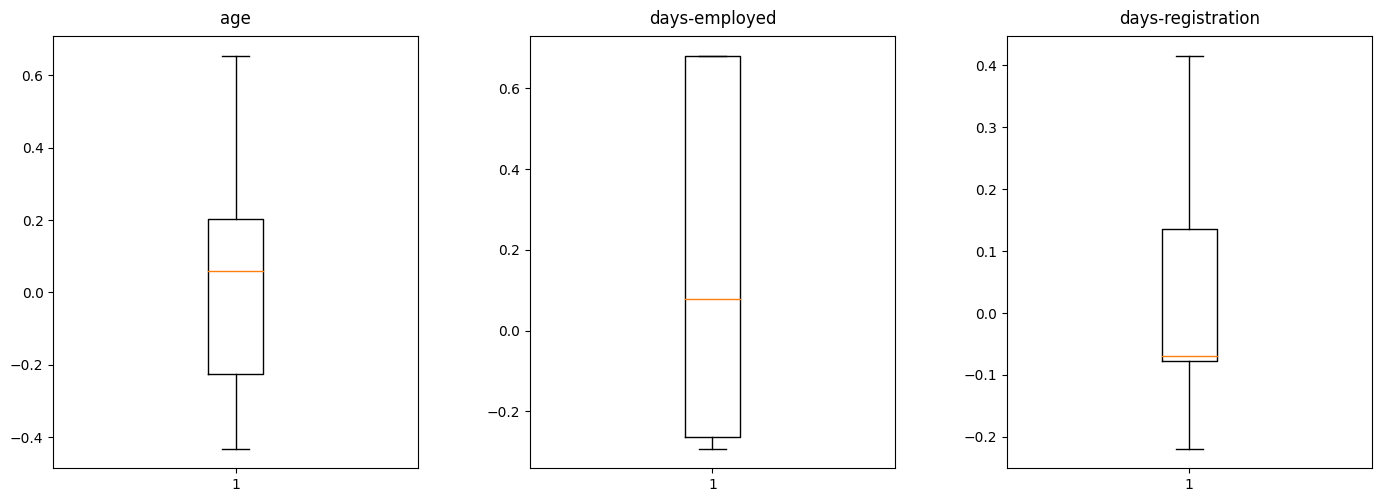

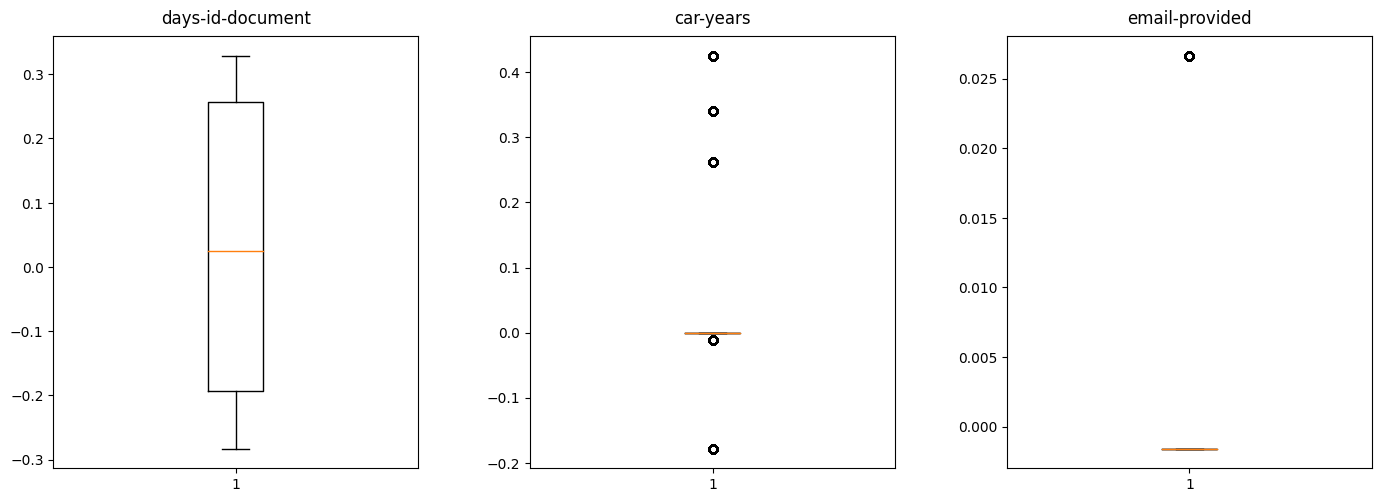

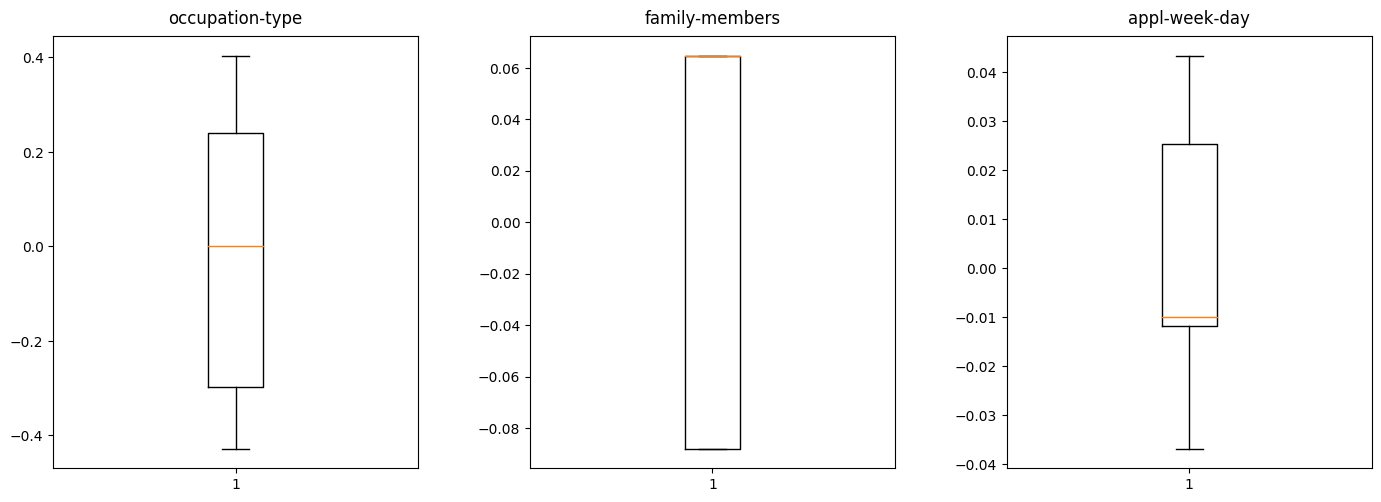

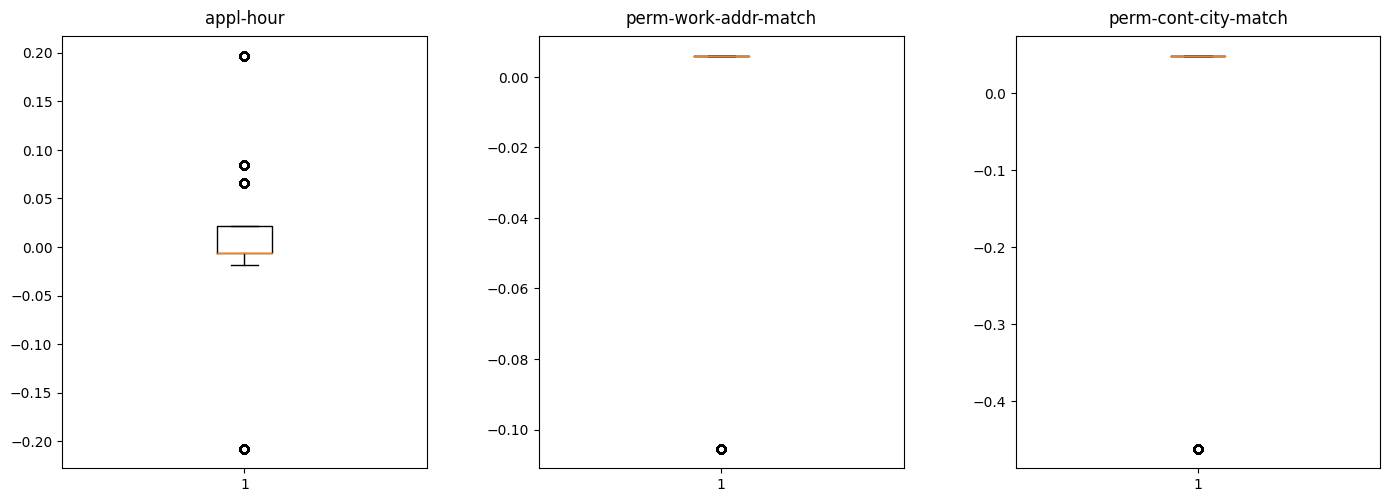

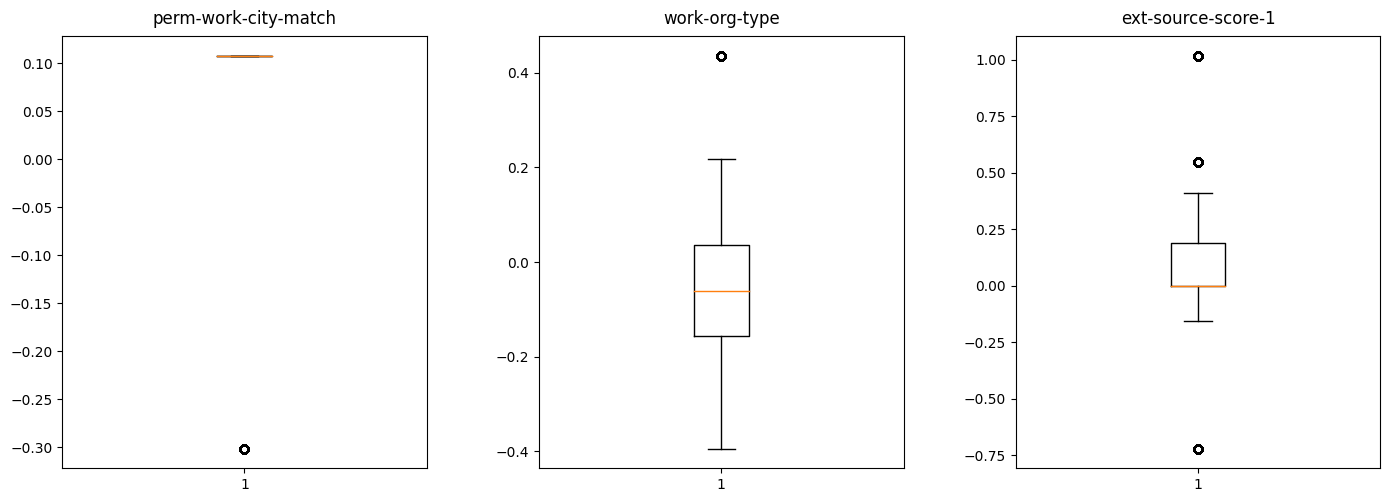

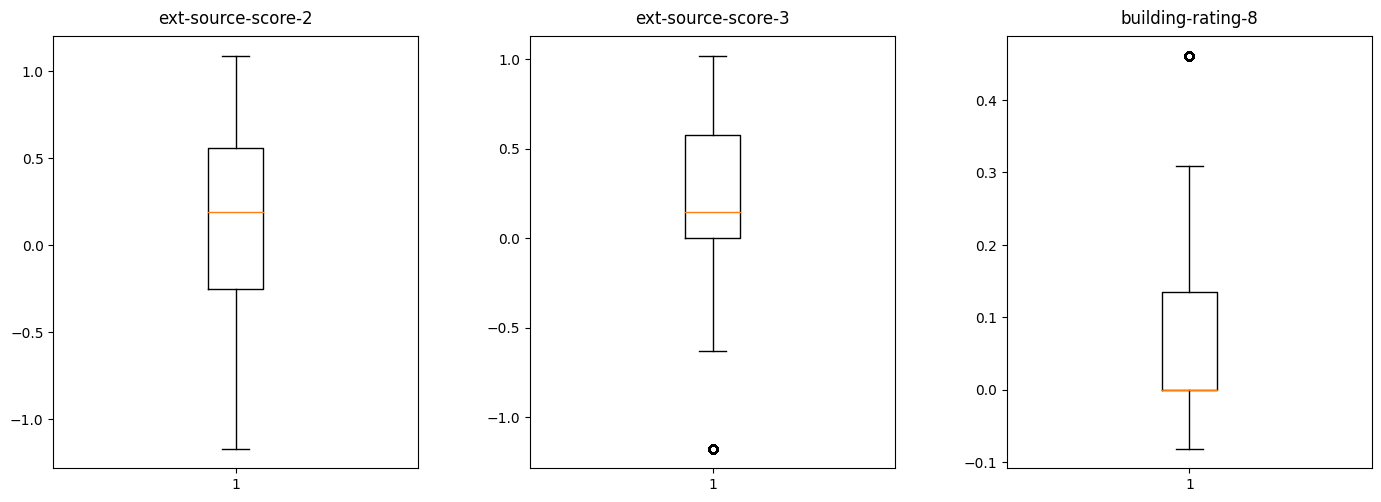

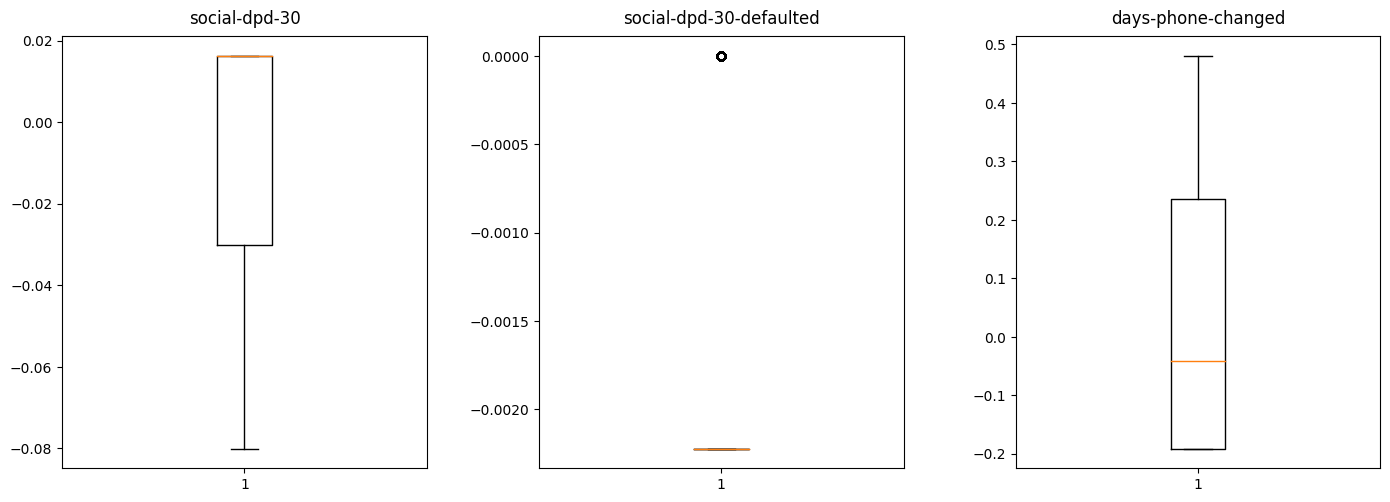

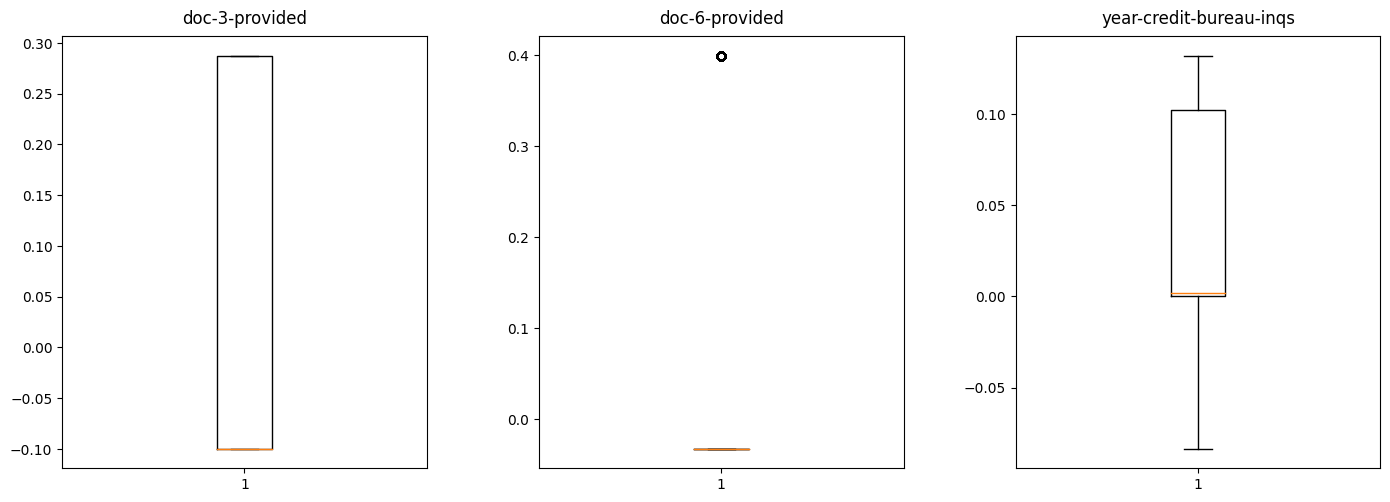

In [22]:
plotting.plot_numerical_boxplots(data, size=(15, 6), save_path=hcdr_prep_dataset_path)

In [23]:
#plotting.plot_numerical_hist_kde(data, size=(15,5), save_path=hcdr_prep_dataset_path)

#### Plot samples count before and after Data cleaning.

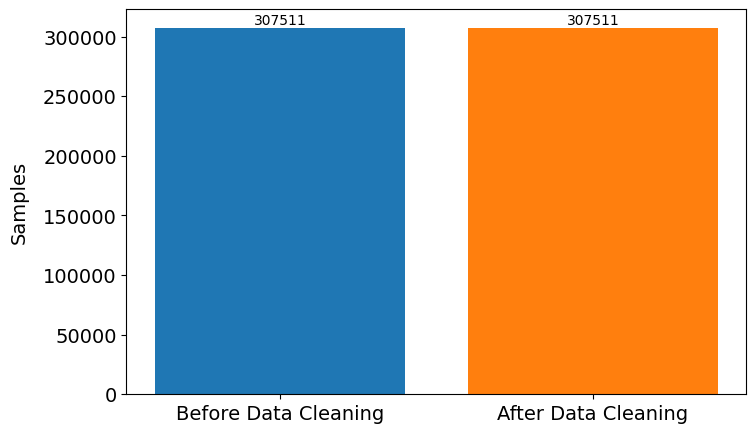

In [24]:
after_data_cleaning_count = len(data)
labels = ['Before Data Cleaning', 'After Data Cleaning']
values = [before_data_cleaning_count, after_data_cleaning_count]
plotting.plot_hist(labels, values, '', '', 'Samples', figsize=(8,5), rotated_ticks=False,
                   save_path=hcdr_prep_dataset_path + 'before_after.pdf')

#### Features IV scores

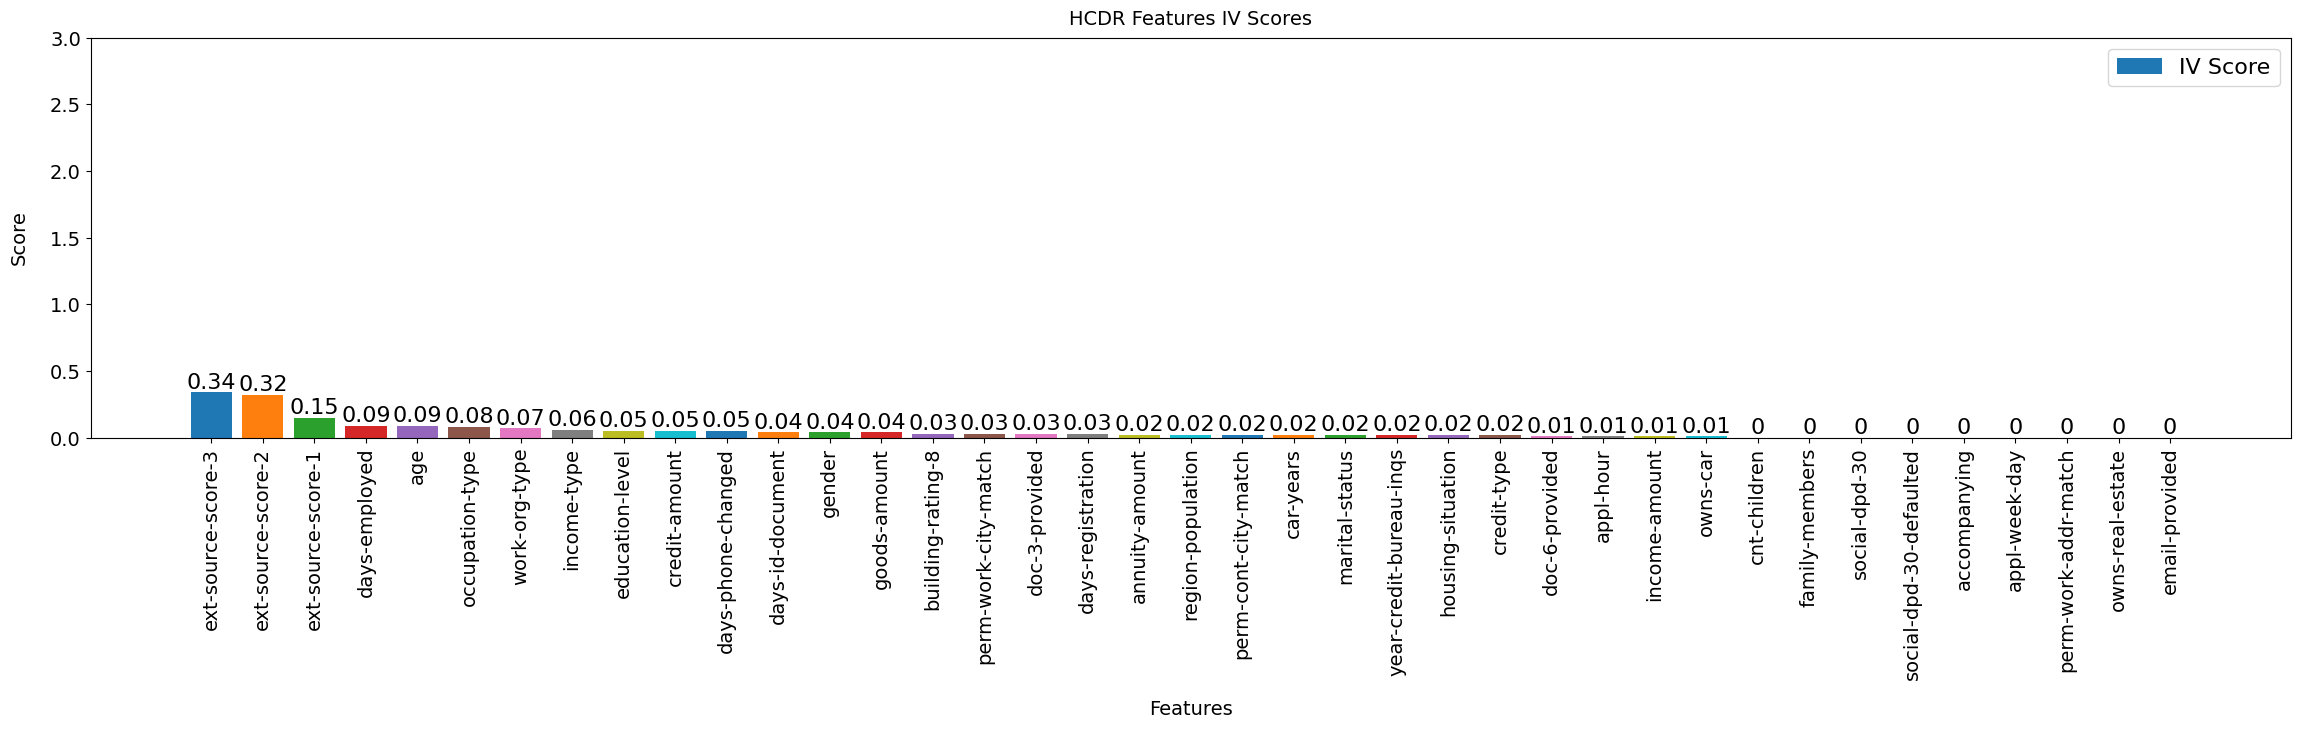

In [25]:
plotting.plot_features_scores(list(features_scores.keys()), list(features_scores.values()), 'HCDR Features IV Scores', figsize=(22, 4))

#### Features correlation

In [26]:
f_corr = preprocessing.features_correlation(data=data)

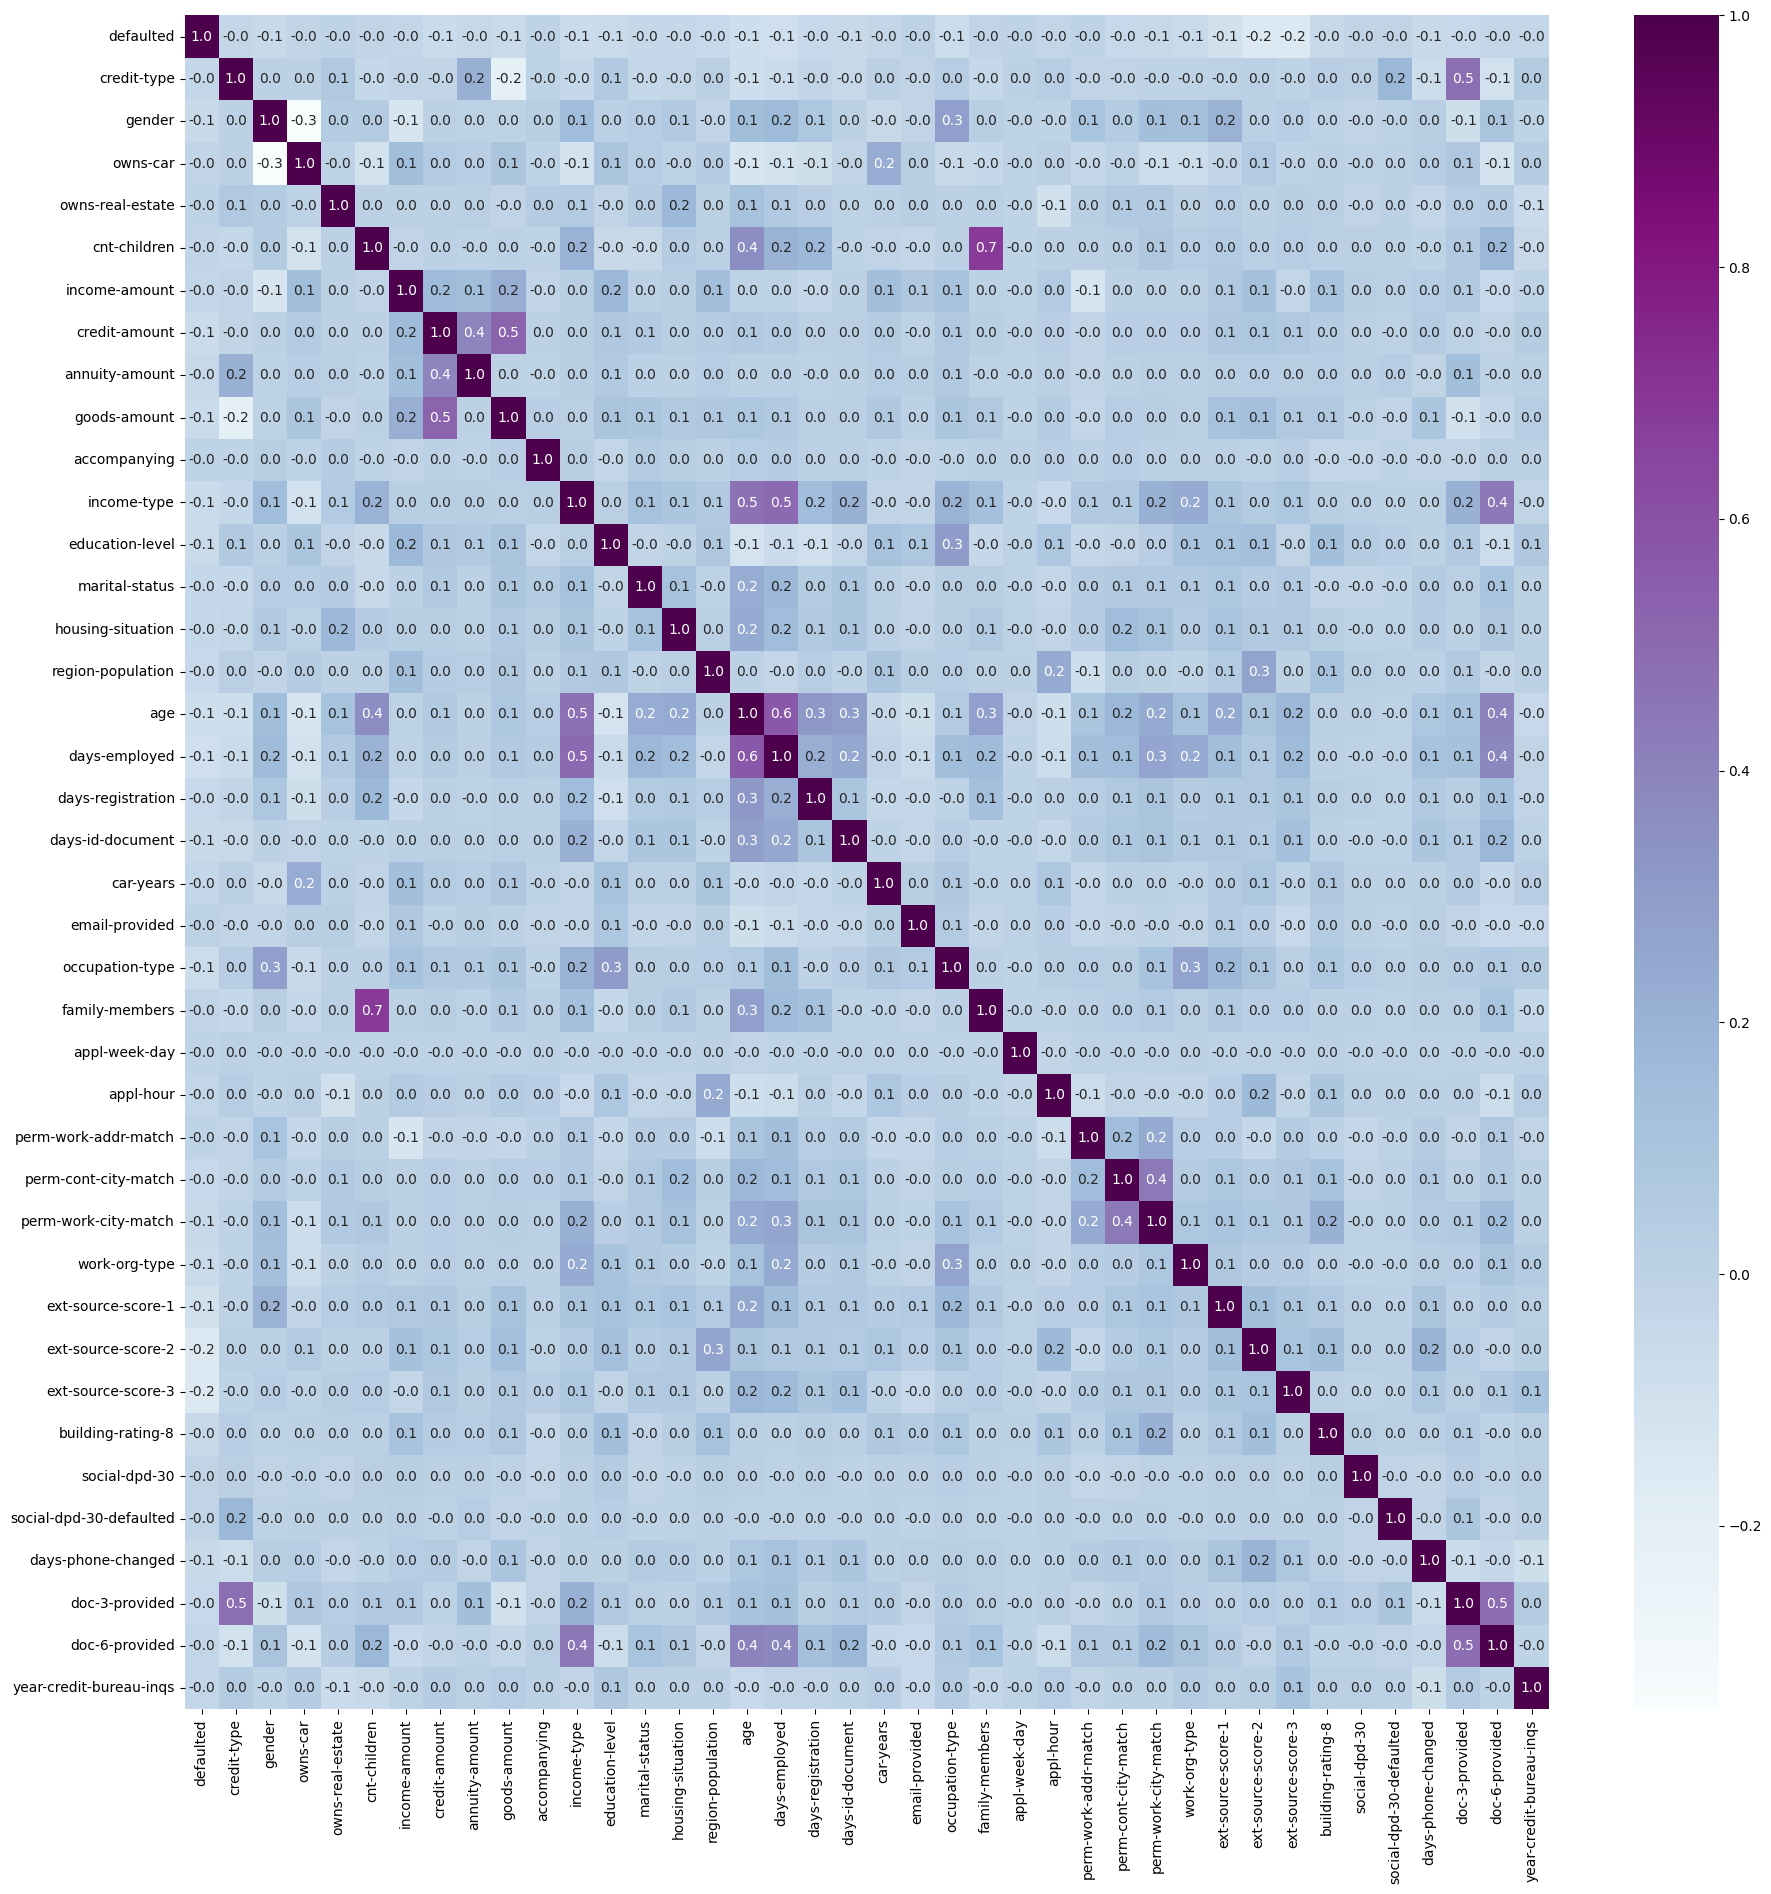

In [27]:
plotting.plot_heatmap(f_corr, figsize=(22, 22), save_path=hcdr_prep_dataset_path, dpi=100)

#### Drop redundant features using IV score.

In [28]:
data.drop(['family-members'], axis=1, inplace=True)

In [29]:
del features_scores['family-members']

#### Save preprocessed dataset.

In [30]:
data

,defaulted,credit-type,gender,owns-car,owns-real-estate,cnt-children,income-amount,credit-amount,annuity-amount,goods-amount,...,ext-source-score-1,ext-source-score-2,ext-source-score-3,building-rating-8,social-dpd-30,social-dpd-30-defaulted,days-phone-changed,doc-3-provided,doc-6-provided,year-credit-bureau-inqs
0,True,-0.036236,-0.250931,-0.056242,0.015093,0.045934,0.022986,-0.388537,-0.115170,-0.143958,...,-0.721189,-0.384543,-1.176614,-0.081602,-0.030141,-0.002224,0.133897,-0.099767,-0.032188,0.102098
1,False,-0.036236,0.154307,-0.056242,-0.033490,0.045934,0.220444,0.425256,-0.041960,0.295792,...,-0.155311,0.371476,0.000000,0.308640,0.004764,-0.002224,-0.040824,-0.099767,-0.032188,0.131724
2,False,0.415543,-0.250931,0.117353,0.015093,0.045934,0.050490,0.327368,0.195039,-0.143958,...,0.000000,0.190548,0.913839,0.000000,0.016206,-0.002224,-0.040824,0.287143,-0.032188,0.131724
3,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.045439,-0.166937,-0.115170,-0.143958,...,0.000000,0.425190,0.000000,0.000000,-0.030141,-0.002224,-0.140862,-0.099767,-0.032188,0.000000
4,False,-0.036236,-0.250931,-0.056242,0.015093,0.045934,-0.079052,-0.207574,-0.070074,0.074176,...,0.000000,-0.384543,0.000000,0.000000,0.016206,-0.002224,0.015677,0.287143,-0.032188,0.131724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,-0.036236,-0.250931,-0.056242,-0.033490,0.045934,-0.045439,0.060453,-0.115170,-0.143958,...,-0.721189,0.630759,0.000000,0.460931,0.016206,-0.002224,-0.191406,0.287143,-0.032188,0.000000
307507,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,0.050490,0.060453,0.195039,-0.143958,...,0.000000,-1.169118,0.000000,-0.081602,0.016206,-0.002224,-0.191406,-0.099767,-0.032188,0.000000
307508,False,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.045439,0.081030,-0.354649,0.074176,...,1.016443,0.050367,-0.629744,0.135167,-0.080059,-0.002224,0.291179,-0.099767,-0.032188,0.102098
307509,True,-0.036236,0.154307,-0.056242,0.015093,0.045934,-0.024923,-0.222612,-0.070074,-0.143958,...,0.000000,0.050367,0.691855,-0.081602,0.016206,-0.002224,-0.191406,-0.099767,-0.032188,0.131724


In [31]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   defaulted                307511 non-null  bool   
 1   credit-type              307511 non-null  float64
 2   gender                   307511 non-null  float64
 3   owns-car                 307511 non-null  float64
 4   owns-real-estate         307511 non-null  float64
 5   cnt-children             307511 non-null  float64
 6   income-amount            307511 non-null  float64
 7   credit-amount            307511 non-null  float64
 8   annuity-amount           307511 non-null  float64
 9   goods-amount             307511 non-null  float64
 10  accompanying             307511 non-null  float64
 11  income-type              307511 non-null  float64
 12  education-level          307511 non-null  float64
 13  marital-status           307511 non-null  float64
 14  hous

**EMP-$p_1$:**

In [32]:
len(data[data['defaulted'] == True])/len(data)

0.08072881945686496

**EMP-$p_0$:**

In [33]:
len(data[data['defaulted'] == False])/len(data)

0.9192711805431351

In [34]:
utilities.save_dataset(data=data, features_scores=features_scores, test_size=0.2,
                       save_path=hcdr_prep_dataset_path)

Train split size: 246008
Test split size: 61503
